# Fatima Fellowship Coding Challenge: Finetune a Generative AI Model

Thank you for applying to the Fatima Fellowship. To help us select the Fellows and assess your ability to do machine learning research, we are asking that you complete a short coding challenge.

**How to submit**: Please make a copy of this colab notebook, add your code and results, and submit your colab notebook along with your application. If you have never used a colab notebook, [check out this video](https://www.youtube.com/watch?v=i-HnvsehuSw)



---


### **Important**: Beore you get started, please make sure to make a **copy of this notebook** and set sharing permissions so that **anyone with the link can view**. Otherwise, we will NOT be able to assess your application.



---



# 0. Description

The purpose of this coding challenge is to finetune a generative AI model on a dataset that *you* build.

The dataset can be of any kind! For example, you could collect a dataset of football jerserys and train a machine learning model to be able to generate jerseys different teams apart. Or, you could finetune a generation model to be able to generate accurate recipes about a particular dish specific to your cuisine.

We are interested in learning more about you and your coding abilities through this short exercise.

# 1. Build a Dataset Based on Your Interests

In the first step, you'll be building your OWN dataset of any kind. We expect that many students might build this dataset by scraping the web e.g. Google Images, or extracting samples from existing datasets (e.g. [from Hugging Face](https://huggingface.co/datasets)). Some suggestions:

* Dataset size: although this can very, we generally recommend that the dataset should have at least 100 (training and validation) samples.
* Dataset diversity: make sure your dataset is sufficiently varied. For example, if your dataset consists of celebrity images, you probably want celebrities of different ages, ethnicities, genders, etc.

You may find Python libraries that download images such as `google_images_download` useful.

Once you have built your dataset, please upload it to Hugging Face Hub using the `datasets` library and include the link below:

#DeepFashion Dataset Pre processing and Splitting


In [1]:
### WRITE YOUR CODE TO BUILD THE DATASET HERE

In [2]:

!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4

In [3]:
from datasets import load_dataset
ds = load_dataset("lirus18/deepfashion")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/13679 [00:00<?, ? examples/s]

In [4]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'openpose', 'cloth', 'caption'],
        num_rows: 13679
    })
})

In [5]:
#loading specific split
data_tr = load_dataset("lirus18/deepfashion", split="train")
data_tr_sample = load_dataset("lirus18/deepfashion", split="train[:100]") # Only sample from the "train" split
print(data_tr)
print(data_tr_sample)

Dataset({
    features: ['image', 'openpose', 'cloth', 'caption'],
    num_rows: 13679
})
Dataset({
    features: ['image', 'openpose', 'cloth', 'caption'],
    num_rows: 100
})


In [6]:
#from datasets import load_dataset
#from sklearn.model_selection import train_test_split

#data = load_dataset("lirus18/deepfashion", split="train")

# Convert the Dataset object to a Pandas DataFrame
#df = data.to_pandas()

# Convert the DataFrame to a list of lists (if you need a list of rows)
##data_list = df.values.tolist()

#train_data, test_data = train_test_split(data_list, test_size=0.2, random_state=42)  # Adjust test_size as needed

# Convert back to Dataset objects if required for your downstream tasks
# ...

In [7]:
data_tr[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x1024>,
 'openpose': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=768x1024>,
 'cloth': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x1024>,
 'caption': ''}

In [8]:

data_tr[:5]

{'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x1024>,
  <PIL.Image.Image image mode=RGB size=768x1024>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x1024>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x1024>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x1024>],
 'openpose': [<PIL.PngImagePlugin.PngImageFile image mode=RGB size=768x1024>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGB size=768x1024>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGB size=768x1024>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGB size=768x1024>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGB size=768x1024>],
 'cloth': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x1024>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x1024>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x1024>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x1024>,
  <PIL.JpegImagePlugin.JpegImageFile image m

In [9]:
import os
from datasets import load_dataset
from PIL import Image
import requests
from io import BytesIO

# Load the "lirus18/deepfashion" dataset
dataset = load_dataset("lirus18/deepfashion", split="train")

In [10]:

# Specify the number of images to download
num_images = 200

In [11]:
import os
import shutil

In [12]:
# Create a directory to save the images if it doesn't exist
image_dir = 'deepfashion_images'
os.makedirs(image_dir, exist_ok=True)


In [13]:
from google.colab import files

In [14]:


# Iterate over the first 100 samples and save each image locally
for i in range(num_images):
    # Get the PIL Image object from the dataset
    img = dataset[i]['image']
    # Save the image locally
    img.save(f"{image_dir}/image_{i}.jpg")

print(f"{num_images} images have been downloaded and saved to the '{image_dir}' directory.")

# Zip the directory
zip_file = shutil.make_archive(image_dir, 'zip', image_dir)

print(f"The directory '{image_dir}' has been compressed into '{zip_file}'.")

# Provide a link to download the zip file
#files.download(zip_file)


200 images have been downloaded and saved to the 'deepfashion_images' directory.
The directory 'deepfashion_images' has been compressed into '/content/deepfashion_images.zip'.


# 2. Finetune a Foundation Model

Now that you have collected a dataset, its time to pick a base model to finetune.


* Go to the [Hugging Face Hub](https://huggingface.co/models) and pick a foundation model to fine-tune. (For example, if you are interested in generating images, you could pick [Stable Diffusion 1.5](https://huggingface.co/runwayml/stable-diffusion-v1-5) or [Stable Diffusion 3](https://huggingface.co/stabilityai/stable-diffusion-3-medium) as your base model.) Make sure to pick a model that can be loaded in the free tier of the Colab Notebook.
* Then finetine the your model on the dataset that you collected in Step 1. There are different ways to finetune a model: [from LoRA to a full finetune](https://huggingface.co/docs/diffusers/v0.13.0/en/training/lora). Pick one of these methods, and explain your reasoning below. We suggest that you use use the `transformers` or `diffusers` library to finetune a foundation model.
* Generate some samples from the base model and from the final finetuned model. How do they compare?  
* [Upload the the model to the Hugging Face Hub](https://huggingface.co/docs/hub/adding-a-model), and add a link to your model below.


In [15]:
# Install dependencies.
!pip install bitsandbytes transformers accelerate peft -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 44.0 MB/s eta 0:00:00


In [16]:
!pip install git+https://github.com/huggingface/diffusers.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [17]:
from PIL import Image

def image_grid(imgs, rows, cols, resize=256):

    if resize is not None:
        imgs = [img.resize((resize, resize)) for img in imgs]
    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

#Loading the splitted deepfashion datsaet from hugging face hub


In [18]:
from datasets import load_dataset

ds = load_dataset("Mansuba/DeepFashionsplit")

Repo card metadata block was not found. Setting CardData to empty.


Resolving data files:   0%|          | 0/100 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/47 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/47 [00:00<?, ? examples/s]

In [19]:
from datasets import load_dataset

# Load the DeepFashion dataset
ds = load_dataset("Mansuba/DeepFashionsplit")

# Print dataset type
print("Dataset type:", type(ds))

# Print available splits (e.g., train, validation, test)
print("Available splits:", ds.keys())

# Print columns in the train split (adjust as needed for other splits)
print("Columns in train split:", ds["train"].column_names)

# Print the first few rows of the train split to inspect data structure (optional)


# Optionally, print the schema of the dataset for detailed column information
print("Schema of the dataset:")
print(ds["train"].features)


Repo card metadata block was not found. Setting CardData to empty.


Resolving data files:   0%|          | 0/100 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/47 [00:00<?, ?it/s]

Dataset type: <class 'datasets.dataset_dict.DatasetDict'>
Available splits: dict_keys(['train', 'test'])
Columns in train split: ['image', 'label']
Schema of the dataset:
{'image': Image(mode=None, decode=True, id=None), 'label': ClassLabel(names=['test', 'train'], id=None)}


In [20]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 100
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 47
    })
})

Repo card metadata block was not found. Setting CardData to empty.


Resolving data files:   0%|          | 0/100 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/47 [00:00<?, ?it/s]

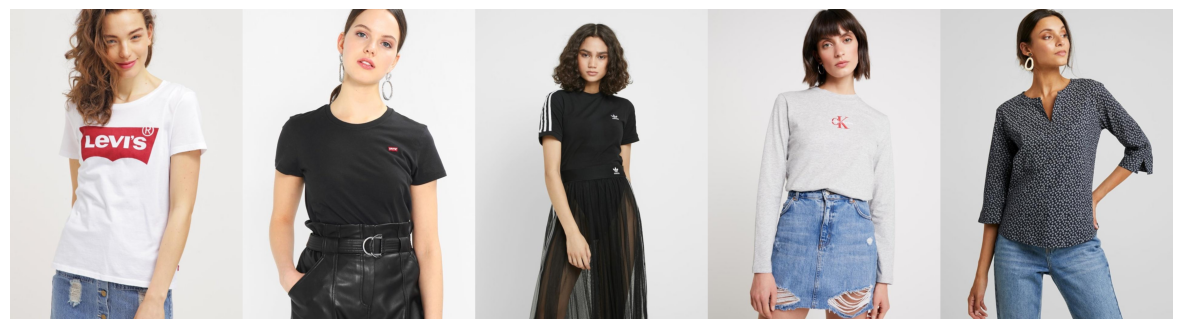

In [21]:
from datasets import load_dataset
from PIL import Image
import matplotlib.pyplot as plt

def image_grid(imgs, rows, cols, resize=None):
    if resize is not None:
        imgs = [img.resize((resize, resize)) for img in imgs]
    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

# Load the DeepFashion dataset
ds = load_dataset("Mansuba/DeepFashionsplit")

# Extract image objects to the first 5 images from the train split
img_objs = ds["train"]["image"][:5]

# Assuming img_objs are already PIL Images, use them directly
imgs = [img for img in img_objs]

# Display the images in a grid
num_imgs_to_preview = len(imgs)
plt.figure(figsize=(15, 5))
plt.imshow(image_grid(imgs, 1, num_imgs_to_preview))
plt.axis('off')
plt.show()


#Generate custom captions with BLIP

In [22]:
import requests
from transformers import AutoProcessor, BlipForConditionalGeneration
import torch
import json
from PIL import Image
import locale
from datasets import load_dataset

device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the processor and the captioning model
blip_processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base", torch_dtype=torch.float16).to(device)

# Captioning utility
def caption_images(input_image):
    inputs = blip_processor(images=input_image, return_tensors="pt").to(device, torch.float16)
    pixel_values = inputs.pixel_values

    generated_ids = blip_model.generate(pixel_values=pixel_values, max_length=50)
    generated_caption = blip_processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return generated_caption


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [23]:
# Load the DeepFashion dataset
ds = load_dataset("Mansuba/DeepFashionsplit")

# Extract image objects to the first 5 images from the train split (you can increase the range as needed)
img_objs = ds["train"]["image"][:5]

Repo card metadata block was not found. Setting CardData to empty.


Resolving data files:   0%|          | 0/100 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/47 [00:00<?, ?it/s]

In [24]:

# Generate captions for the DeepFashion images
caption_prefix = "a photo of a person wearing "  # Adjust the prefix as needed
metadata = []
for img in img_objs:
    caption = caption_prefix + caption_images(img).split("\n")[0]
    entry = {"file_name": img.filename.split("/")[-1], "prompt": caption}
    metadata.append(entry)


In [25]:
# Save the metadata to a JSONL file
with open('DeepFashion_metadata.jsonl', 'w') as outfile:
    for entry in metadata:
        json.dump(entry, outfile)
        outfile.write('\n')


In [26]:
# Clean up
import gc
del blip_processor, blip_model
gc.collect()
torch.cuda.empty_cache()

#Prep for training

In [27]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!accelerate config default

accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [28]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!accelerate config default

Configuration already exists at /root/.cache/huggingface/accelerate/default_config.yaml, will not override. Run `accelerate config` manually or pass a different `save_location`.


In [29]:
from huggingface_hub import notebook_login
notebook_login()

In [37]:
!pip install datasets -q

In [39]:


# Update the training script to use the DeepFashion dataset
!accelerate launch train_dreambooth_lora_sdxl.py \
  --pretrained_model_name_or_path="stabilityai/stable-diffusion-xl-base-1.0" \
  --pretrained_vae_model_name_or_path="madebyollin/sdxl-vae-fp16-fix" \
  --dataset_name="DeepFashion_metadata.jsonl" \
  --output_dir="Lora_train" \
  --caption_column="prompt" \
  --mixed_precision="fp16" \
  --instance_prompt="a photo of a person wearing" \
  --resolution=1024 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=3 \
  --gradient_checkpointing \
  --learning_rate=1e-4 \
  --snr_gamma=5.0 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --mixed_precision="fp16" \
  --use_8bit_adam \
  --max_train_steps=500 \
  --checkpointing_steps=717 \
  --seed="0"


/usr/bin/python3: can't open file '/content/train_dreambooth_lora_sdxl.py': [Errno 2] No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/accelerate", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/accelerate/commands/accelerate_cli.py", line 48, in main
    args.func(args)
  File "/usr/local/lib/python3.10/dist-packages/accelerate/commands/launch.py", line 1097, in launch_command
    simple_launcher(args)
  File "/usr/local/lib/python3.10/dist-packages/accelerate/commands/launch.py", line 703, in simple_launcher
    raise subprocess.CalledProcessError(returncode=process.returncode, cmd=cmd)
subprocess.CalledProcessError: Command '['/usr/bin/python3', 'train_dreambooth_lora_sdxl.py', '--pretrained_model_name_or_path=stabilityai/stable-diffusion-xl-base-1.0', '--pretrained_vae_model_name_or_path=madebyollin/sdxl-vae-fp16-fix', '--dataset_name=DeepFashion_metadata.jsonl', '--output_dir=Lora_train', '--caption_colum

In [40]:
from huggingface_hub import whoami
from pathlib import Path
#@markdown make sure the `output_dir` you specify here is the same as the one used for training
output_dir ='Lora_train' #@param
username = whoami(token=Path("/root/.cache/huggingface/"))["name"]
repo_id = f"{username}/{output_dir}"

In [41]:
from huggingface_hub import whoami, create_repo, upload_folder
from pathlib import Path
import os
import json

# Define a function to save the model card
def save_model_card(repo_id, base_model, instance_prompt, repo_folder, vae_path=None, images=[]):
    # Create the directory if it doesn't exist
    os.makedirs(repo_folder, exist_ok=True)

    # Create a model card dictionary
    model_card = {
        "model_id": repo_id,
        "base_model": base_model,
        "instance_prompt": instance_prompt,
        "vae_path": vae_path,
        "images": images,
        "repo_folder": repo_folder,
    }

    # Write the model card to a README.md file in the repository folder
    with open(f"{repo_folder}/README.md", "w") as f:
        f.write(f"# Model Card for {repo_id}\n")
        f.write(f"## Base Model: {base_model}\n")
        f.write(f"## Instance Prompt: {instance_prompt}\n")
        if vae_path:
            f.write(f"## VAE Path: {vae_path}\n")
        for image in images:
            f.write(f"![image]({image})\n")

    # Return the model card dictionary (optional)
    return model_card

# Make sure the `output_dir` you specify here is the same as the one used for training
output_dir = 'Lora_train'  # @param

# Get the username from Hugging Face Hub
username = whoami(token=Path("/root/.cache/huggingface/"))["name"]
repo_id = f"{username}/{output_dir}"

# Create a new repository (if it doesn't exist)
repo_id = create_repo(repo_id, exist_ok=True).repo_id

# Create and save the model card
save_model_card(
    repo_id=repo_id,
    images=[],  # Add paths to example images if available
    base_model="stabilityai/stable-diffusion-xl-base-1.0",
    instance_prompt="a photo of a person wearing",
    repo_folder=output_dir,
    vae_path="madebyollin/sdxl-vae-fp16-fix"  # Adjust this parameter based on your actual use case
)

# Upload the model folder to the Hugging Face Hub
upload_folder(
    repo_id=repo_id,
    folder_path=output_dir,
    commit_message="End of training",
    ignore_patterns=["step_*", "epoch_*"],
)

from IPython.display import display, Markdown

link_to_model = f"https://huggingface.co/{repo_id}"
display(Markdown(f"### Your model has finished training.\nAccess it here: {link_to_model}"))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/hf_api.py:3664: UserWarning: Warnings while validating metadata in README.md:
- empty or missing yaml metadata in repo card
  warnings.warn(f"Warnings while validating metadata in README.md:\n{message}")


### Your model has finished training.
Access it here: https://huggingface.co/Mansuba/Lora_train

In [42]:
from IPython.display import display, Markdown

link_to_model = f"https://huggingface.co/{repo_id}"
display(Markdown("### Your model has finished training.\nAccess it here: {}".format(link_to_model)))

### Your model has finished training.
Access it here: https://huggingface.co/Mansuba/Lora_train

#Inference 🐕

In [43]:
import torch
from diffusers import DiffusionPipeline, AutoencoderKL

vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
)
pipe.load_lora_weights(repo_id)
_ = pipe.to("cuda")

config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

  0%|          | 0/30 [00:00<?, ?it/s]

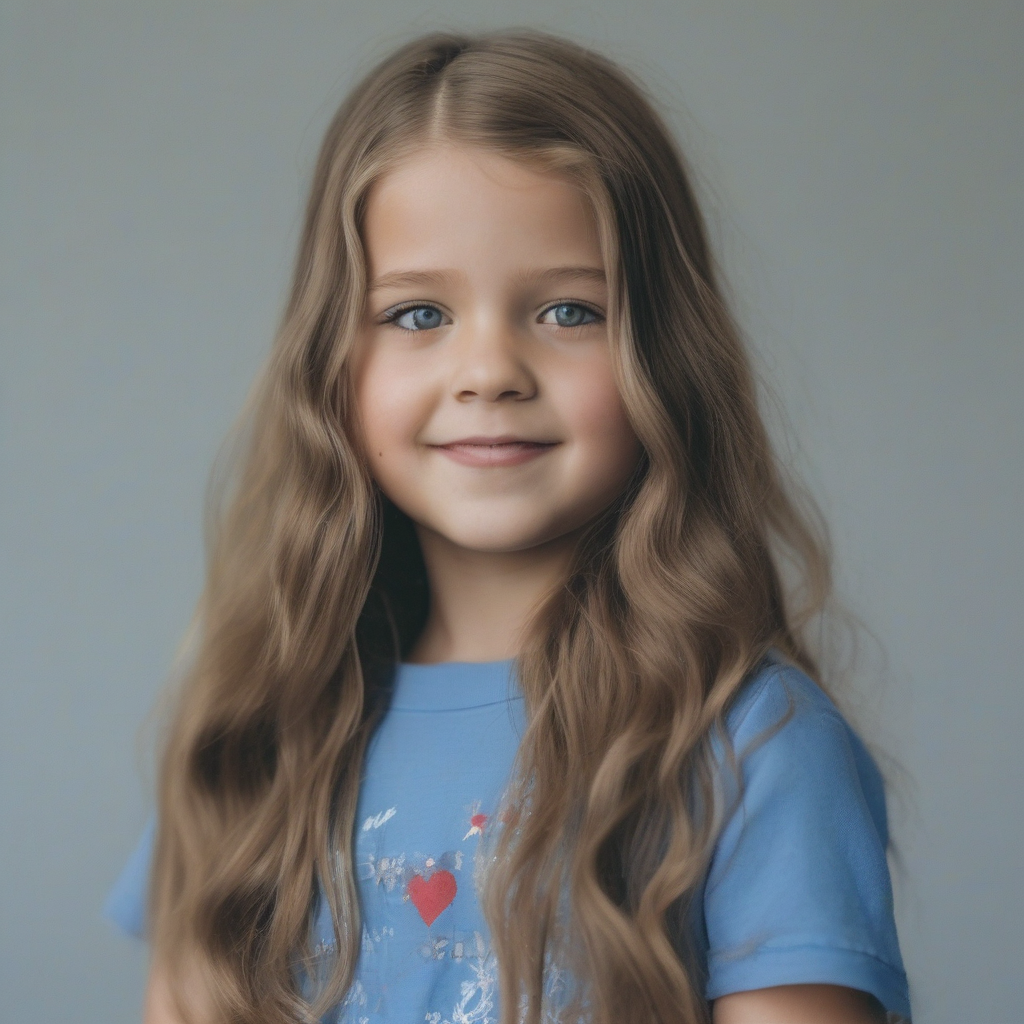

In [48]:
prompt = "a girl wearing blue  t shirt" # @param

image = pipe(prompt=prompt, num_inference_steps=30).images[0]
image